In [12]:
import itertools
from tokenize import PlainToken
import pandas as pd
import numpy as np
from random import gauss
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

from pandas.plotting import autocorrelation_plot
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from dateutil.easter import easter
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_yearly, add_changepoints_to_plot

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

# Custom plotting preferences for cleaner visuals
from utils.plot_styles import apply_style
apply_style('clean')

import warnings 
warnings.simplefilter(action='ignore', category= FutureWarning)

import plotly.graph_objs as go



In [13]:
from pathlib import Path

def find_project_root():
    p = Path.cwd().resolve()
    for candidate in [p] + list(p.parents):
        if (candidate / "data_science").is_dir():
            return candidate
    return p  # fallback: current dir

class CFG:
    project_root = find_project_root()
    data_folder = project_root / "data_science" / "datasets" / "raw"  # Use project_root directly
    img_dim1 = 15
    img_dim2 = 10

plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})

In [14]:
import kagglehub
from pathlib import Path
import shutil

# Download dataset to KaggleHub's default cache (~/.cache/kagglehub)
path = kagglehub.dataset_download("konradb/tsdata-1")
print("Downloaded to:", path)

# Move or copy the dataset into your project data folder
raw_data_dir = Path("/Users/q/Projects/data_science/datasets/raw/")
raw_data_dir.mkdir(parents=True, exist_ok=True)

for file in Path(path).glob("*"):
    shutil.copy(file, raw_data_dir / file.name)

print("Copied to:", raw_data_dir)

Downloaded to: /Users/q/.cache/kagglehub/datasets/konradb/tsdata-1/versions/10
Copied to: /Users/q/Projects/data_science/datasets/raw


<Axes: >

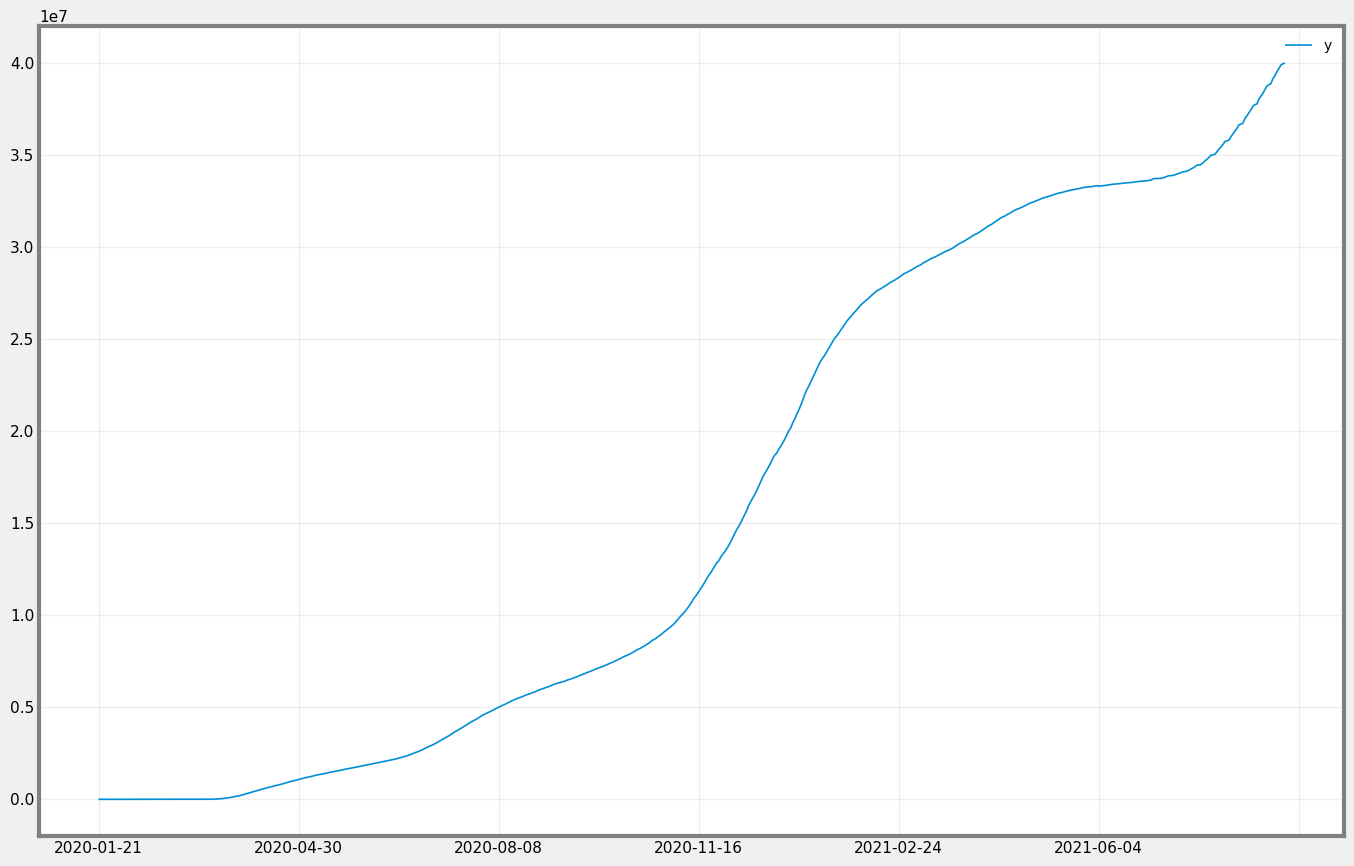

In [15]:
df = pd.read_csv(CFG.data_folder / "us_covid.csv")
xdat = df[["date","cases"]].rename(columns={"date":"ds","cases":"y"})
xdat.set_index("ds").plot(figsize=(CFG.img_dim1, CFG.img_dim2), xlabel="")

16:58:49 - cmdstanpy - INFO - Chain [1] start processing


16:58:49 - cmdstanpy - INFO - Chain [1] done processing


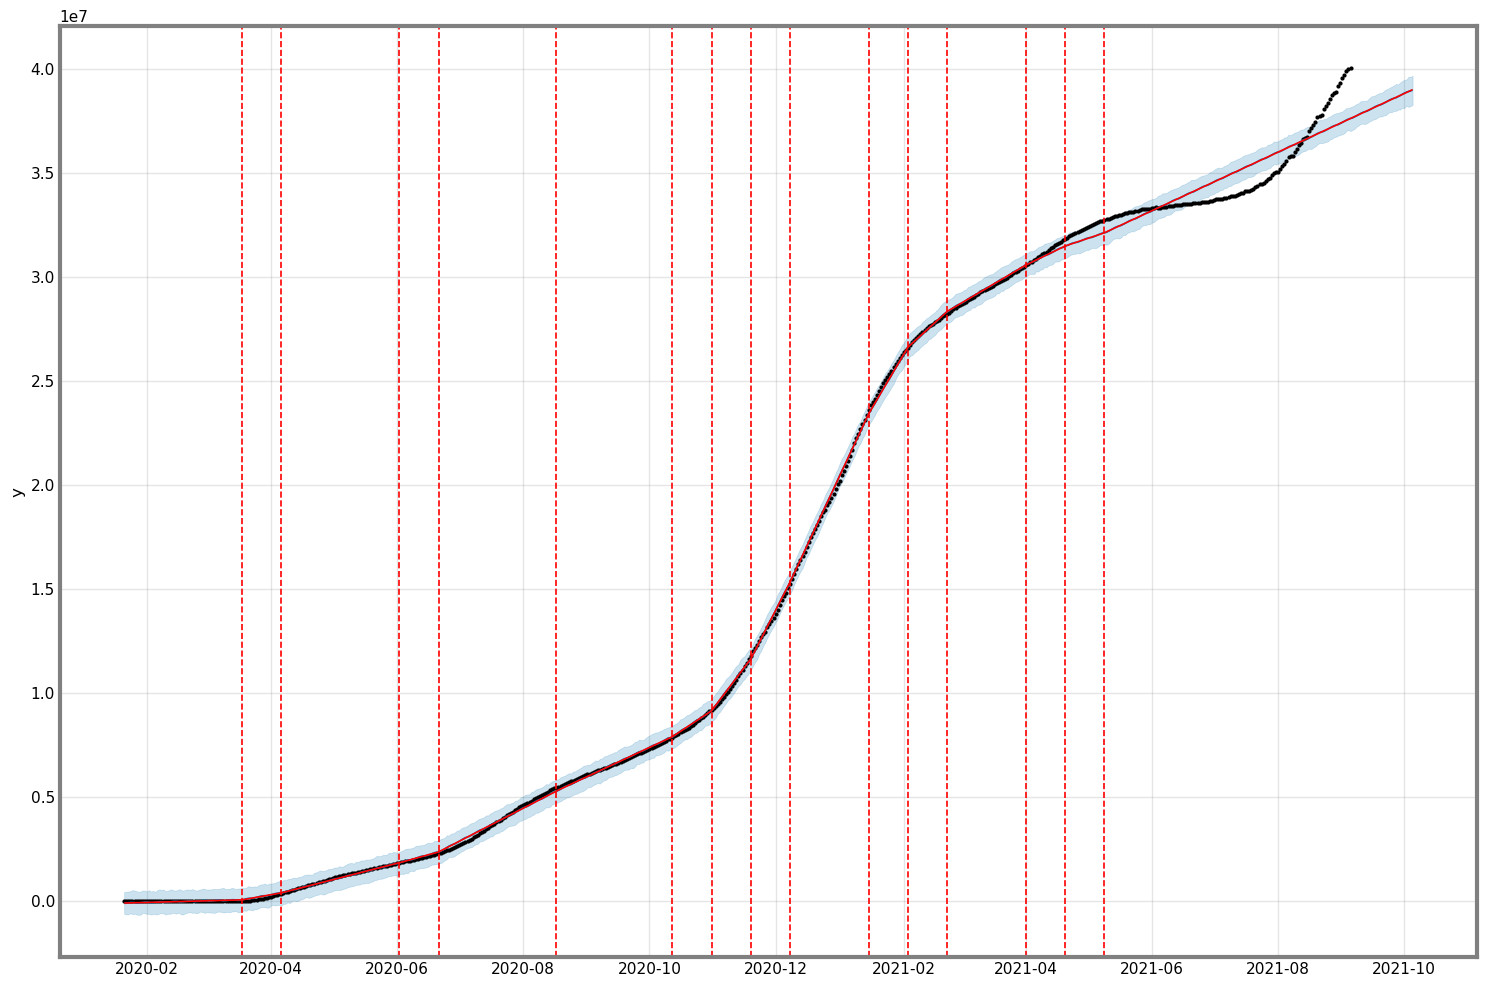

In [17]:
# automatic detection of change points

m = Prophet()
m.fit(xdat)
future = m.make_future_dataframe(periods=30)
forcast = m.predict(future)
fig = m.plot(forcast, figsize=(CFG.img_dim1, CFG.img_dim2), xlabel = '')
a = add_changepoints_to_plot(fig.gca(), m, forcast)

17:03:41 - cmdstanpy - INFO - Chain [1] start processing


17:03:41 - cmdstanpy - INFO - Chain [1] done processing


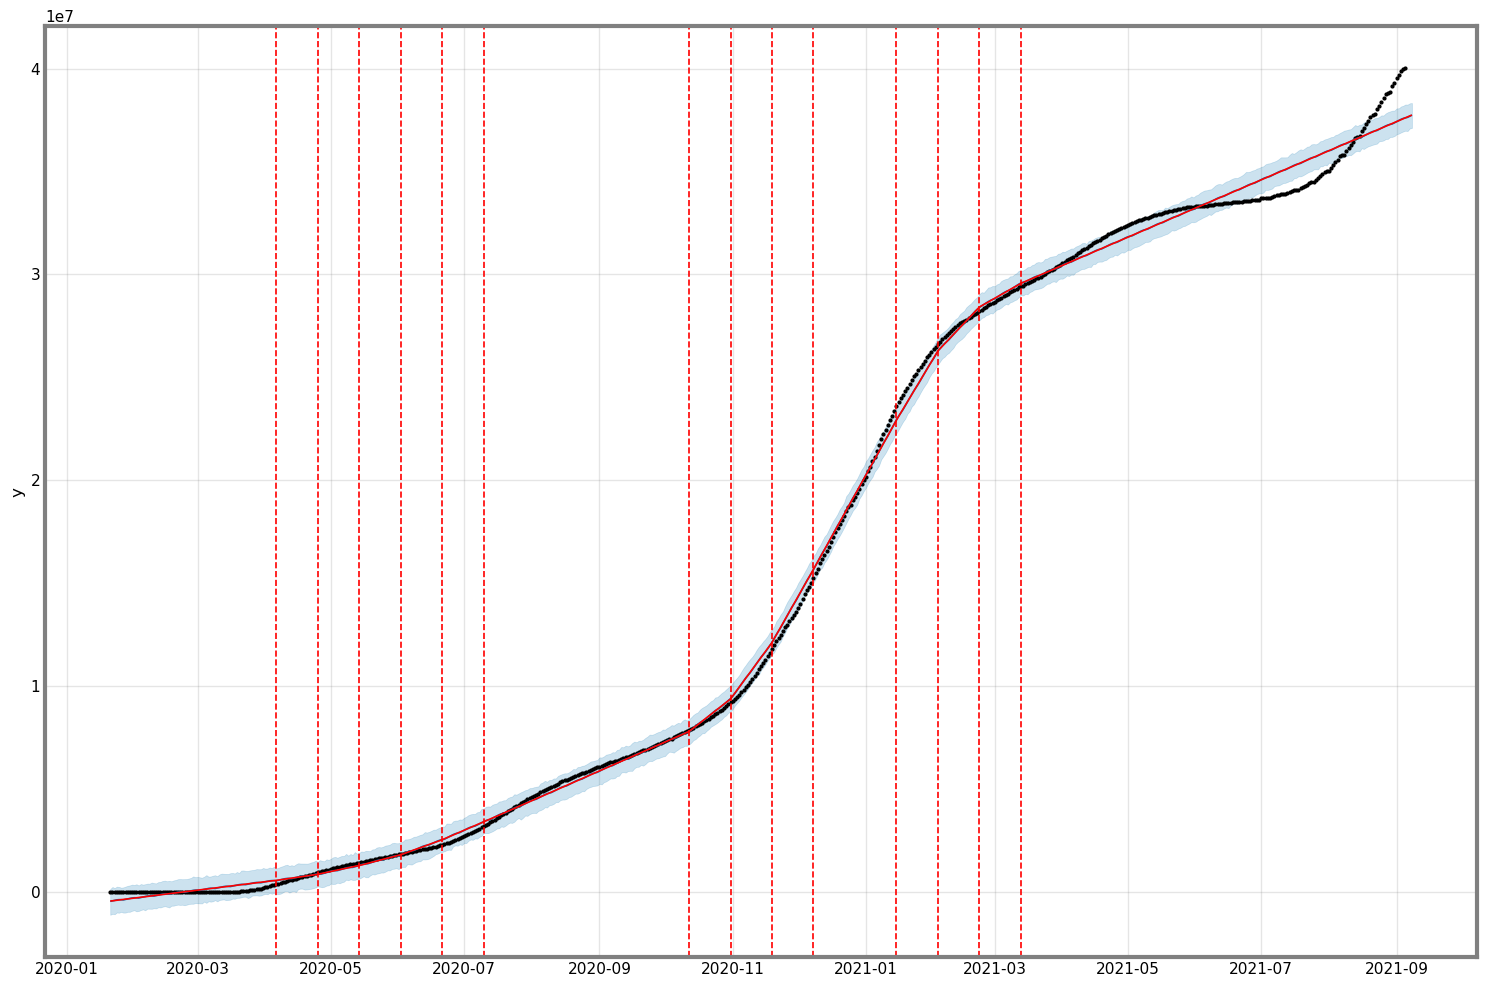

In [19]:
m = Prophet(changepoint_prior_scale=0.01)
m.fit(xdat)
future = m.make_future_dataframe(periods=3)
forcast = m.predict(future)
fig = m.plot(forcast, figsize=(CFG.img_dim1, CFG.img_dim2), xlabel = '')
a = add_changepoints_to_plot(fig.gca(), m, forcast)

In [ ]:
df = pr.read_csv()